In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
diabetes = pd.read_csv('train.csv')

In [4]:
diabetes

,# age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028017,0.011349,346.0
1,-0.070900,0.050680,-0.089197,-0.074528,-0.042848,-0.025739,-0.032356,-0.002592,-0.012908,-0.054925,104.0
2,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022512,0.007207,49.0
3,0.048974,0.050680,0.081097,0.021872,0.043837,0.064134,-0.054446,0.071210,0.032433,0.048628,180.0
4,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
...,...,...,...,...,...,...,...,...,...,...,...
326,0.012648,-0.044642,-0.020218,-0.015999,0.012191,0.021233,-0.076536,0.108111,0.059881,-0.021788,233.0
327,0.019913,-0.044642,-0.057941,-0.057314,-0.001569,-0.012587,0.074412,-0.039493,-0.061177,-0.075636,63.0
328,0.023546,-0.044642,0.070319,0.025315,-0.034592,-0.014466,-0.032356,-0.002592,-0.019197,-0.009362,288.0
329,0.016281,0.050680,0.072474,0.076958,-0.008449,0.005575,-0.006584,-0.002592,-0.023645,0.061054,131.0


In [196]:
diabetes.shape

(331, 11)

In [21]:
diabetes['Y'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0      346.0
1      104.0
2       49.0
3      180.0
4      110.0
       ...  
326    233.0
327     63.0
328    288.0
329    131.0
330     42.0
Name: Y, Length: 331, dtype: float64>

In [5]:
dependent_variable = 'Y'

In [6]:
# Create a list of independent variables
independent_variables = diabetes.columns.tolist()

In [7]:
independent_variables.remove(dependent_variable)

In [8]:
independent_variables

['# age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
# Create the data of independent variables
x = np.array(diabetes[independent_variables].values)

# Create the data of dependent variable
y = np.array(diabetes[dependent_variable].values)

In [10]:
x.shape

(331, 10)

In [14]:
# splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [15]:
# fitting multiple linear regressio to the training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [18]:
# predicting the test and train set results
test_pred = regressor.predict(x_test)
train_pred = regressor.predict(x_train)

Coefficients: 
 [   7.15794499 -299.16119742  581.00268661  275.41804717 -870.88085731
  536.05778243  166.17455524   67.99801034  870.68467898   64.55769713]
Variance score: 0.3485613222345747


Text(0.5, 1.0, 'Residual errors')

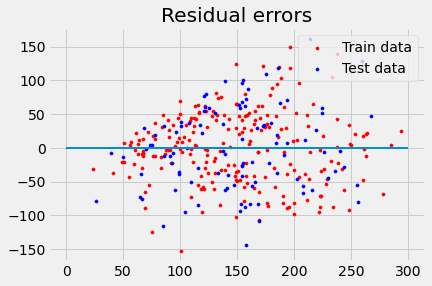

In [20]:
print('Coefficients: \n', regressor.coef_) 
print('Variance score: {}'.format(regressor.score(x_test, y_test))) 

plt.style.use('fivethirtyeight') 

plt.scatter(train_pred, train_pred - y_train, 
            color = "red", s = 10, label = 'Train data') 

plt.scatter(test_pred, test_pred - y_test,
            color = "blue", s = 10, label = 'Test data') 

plt.hlines(y = 0, xmin = 0, xmax = 300, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 

In [23]:
# the mean square error
"Mean squared error: %.2f" % mean_squared_error(y_test, y_pred)


'Mean squared error: 3661.26'

In [24]:
r2_score(y_test, y_pred)

0.3485613222345747